In [33]:
import re
import regex
import pandas as pd
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
import datetime
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

In [34]:
def date_time(s):
  pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
  result = re.match(pattern, s)
  if result:
     return True
  return False

In [35]:
def FindAuthor(s):
  s=s.split(":")
  if len(s)==2:
    return True
  else:
    return False

In [36]:
def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if FindAuthor(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message

In [37]:
def split_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
      if any(char in emoji.EMOJI_DATA for char in word):
        emoji_list.append(word)

    return emoji_list

In [38]:
parseddata = []
conversation = 'WhatsApp Chat with Ghorpade F_A_M_I_L_Y.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                parseddata.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

In [39]:
df = pd.DataFrame(parseddata, columns=["Date", 'Time', 'Author', 'Message'])
df['Date'] = pd.to_datetime(df['Date'])
df = df.dropna()
df["emoji"]= df["Message"].apply(split_count)
URLPATTERN = r'(https?//\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
print(df.tail(20))
print(df.info())
print(df.Author.unique())

          Date      Time           Author  \
299 2022-06-11  12:55 pm   Bhagyashri Bai   
301 2022-06-11   2:06 pm   Dilip Mama CSN   
302 2022-06-11   2:06 pm   Dilip Mama CSN   
303 2022-06-11   2:06 pm   Dilip Mama CSN   
304 2022-06-11   2:35 pm  +91 97663 44024   
305 2022-07-11   7:28 am  +91 86691 34986   
306 2022-07-11   9:59 am  +91 89284 65881   
307 2022-07-11  10:22 am   Dilip Mama CSN   
308 2022-07-11  10:43 am  +91 86691 34986   
309 2022-07-11  10:43 am  +91 86691 34986   
310 2022-07-11  10:44 am  +91 86691 34986   
311 2022-07-11  10:44 am  +91 86691 34986   
312 2022-07-11  10:59 am  +91 97028 47544   
313 2022-07-11  11:52 am  +91 95949 31199   
314 2022-07-11  11:54 am             Papa   
315 2022-07-11   5:46 pm   Dilip Mama CSN   
317 2022-07-11   7:16 pm  +91 86691 34986   
318 2022-08-11   2:42 pm  +91 86691 34986   
319 2022-08-11   8:49 pm  +91 86691 34986   
320 2022-08-11   9:42 pm  +91 86691 34986   

                                               Message

In [40]:
df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307 entries, 0 to 320
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      307 non-null    datetime64[ns]
 1   Time      307 non-null    object        
 2   Author    307 non-null    object        
 3   Message   307 non-null    object        
 4   emoji     307 non-null    object        
 5   urlcount  307 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 16.8+ KB


In [41]:
total_messages = df.shape[0]
print(total_messages)

307


In [42]:
media_messages = df[df["Message"]=='<Media omitted>'].shape[0]
print(media_messages)

122


In [43]:
emojis=df["emoji"].shape[0]
print(emojis)

307


In [44]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)


print("Chats in group")
print("Total Messages: ", total_messages)
print("Number of Media Shared: ", media_messages)
print("Number of Emojis Shared", emojis)
print("Number of Links Shared", links)

Chats in group
Total Messages:  307
Number of Media Shared:  122
Number of Emojis Shared 307
Number of Links Shared 8


In [45]:
link_messages = df[df['urlcount']>0]
deleted_messages=df[(df["Message"]=="You deleted this message")| (df["Message"]=="This message was deleted.")]
media_messages_df = df[(df['Message'] == '<Media omitted>')|(df['Message']=='image omitted')|(df['Message']== 'video omitted.')]
messages_df = df.drop(media_messages_df.index)
messages_df = messages_df.drop(deleted_messages.index)
messages_df = messages_df.drop(link_messages.index)


In [46]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 2 to 318
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      179 non-null    datetime64[ns]
 1   Time      179 non-null    object        
 2   Author    179 non-null    object        
 3   Message   179 non-null    object        
 4   emoji     179 non-null    object        
 5   urlcount  179 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 9.8+ KB


In [47]:
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1



In [48]:
messages_df.head(10)

,Date,Time,Author,Message,emoji,urlcount,Letter_Count,Word_Count,MessageCount
2,2022-02-10,9:19 am,+91 86691 34986,एक सासु माँ की अम्बे माता से निर्दोष प्रार्थना...,"[🤪, 😛]",0,210,47,1
3,2022-02-10,9:19 am,+91 86691 34986,IMG-20221002-WA0005.jpg (file attached),[],0,39,3,1
4,2022-03-10,5:43 am,Bhagyashri Bai,IMG-20221003-WA0002.jpg (file attached) वाढदिव...,"[🍫, 🎂, 💐, 🍫, 🎂, 💐]",0,81,7,1
5,2022-03-10,7:38 am,+91 95949 31199,Happy birthday dear Apeksha 🎂🎂🎂 Stay blessed a...,"[🎂, 🎂, 🎂, 🎊]",0,53,9,1
6,2022-03-10,7:41 am,+91 80559 35953,Happy Birthday 🥳🥳 Bappa bless u 😀,"[🥳, 🥳, 😀]",0,33,7,1
7,2022-03-10,8:29 am,+91 97028 47544,वाढदिवसाच्या हार्दिक शुभेच्छा 🎂💐💐💐,"[🎂, 💐, 💐, 💐]",0,34,4,1
20,2022-03-10,9:08 am,+91 86691 34986,STK-20220211-WA0023.webp (file attached),[],0,40,3,1
21,2022-03-10,9:09 am,+91 86691 34986,फारज उपक्रम छान आहे👍,[👍],0,20,4,1
22,2022-03-10,9:18 am,Dilip Mama CSN,STK-20220612-WA0003.webp (file attached),[],0,40,3,1
23,2022-03-10,9:27 am,Kajal Tai,Happy birthday dear vahini🎁🎂🥳🥰🥰gbu,"[🎁, 🎂, 🥳, 🥰, 🥰]",0,34,4,1


In [49]:
messages_df["emojicount"]=df['emoji'].str.len()

In [50]:
members= messages_df.Author.unique()
for i in range(len(members)):
  req_df= messages_df[messages_df["Author"] == members[i]]
  print(f'Stats of {members[i]} -')
  print('Messages Sent', req_df.shape[0])
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Average Words per message', words_per_message)
  media = media_messages_df[media_messages_df['Author'] == members[i]].shape[0]
  print('Media Messages Sent', media) 
  links=sum(link_messages[link_messages['Author']==members[i]]["urlcount"])
  print('Links Sent',links)
  print()
  

Stats of +91 86691 34986 -
Messages Sent 28
Average Words per message 51.32142857142857
Media Messages Sent 49
Links Sent 4

Stats of Bhagyashri Bai -
Messages Sent 19
Average Words per message 33.31578947368421
Media Messages Sent 0
Links Sent 1

Stats of +91 95949 31199 -
Messages Sent 17
Average Words per message 31.352941176470587
Media Messages Sent 2
Links Sent 0

Stats of +91 80559 35953 -
Messages Sent 4
Average Words per message 6.0
Media Messages Sent 0
Links Sent 0

Stats of +91 97028 47544 -
Messages Sent 10
Average Words per message 4.0
Media Messages Sent 1
Links Sent 0

Stats of Dilip Mama CSN -
Messages Sent 37
Average Words per message 60.729729729729726
Media Messages Sent 61
Links Sent 3

Stats of Kajal Tai -
Messages Sent 14
Average Words per message 1.7142857142857142
Media Messages Sent 1
Links Sent 0

Stats of Apeksha Mami Nsk -
Messages Sent 3
Average Words per message 5.333333333333333
Media Messages Sent 0
Links Sent 0

Stats of Komal -
Messages Sent 1
Average

In [51]:
total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x:x[1], reverse=True)
print(emoji_dict)

[('🎂', 66), ('💐', 51), ('👌', 29), ('🤣', 25), ('🥰', 23), ('😂', 18), ('🙏', 18), ('🚩', 17), ('🍫', 16), ('😀', 16), ('👉', 15), ('🥳', 14), ('🌹', 13), ('👌🏻', 13), ('🙏🏻', 10), ('🎉', 10), ('👍', 8), ('😄', 8), ('🎊', 7), ('😘', 7), ('❤️', 6), ('🎈', 4), ('🌷', 4), ('😁', 4), ('🎁', 3), ('😇', 3), ('🍭', 3), ('🧁', 3), ('😜', 3), ('🤗', 3), ('🤨', 3), ('❣️', 3), ('🤪', 2), ('😊', 2), ('😍', 2), ('🍬', 2), ('👇', 2), ('👍🏻', 2), ('😡', 2), ('😆', 2), ('🌻', 2), ('🌺', 2), ('😛', 1), ('🤭', 1), ('🙆\u200d♀️', 1), ('💥', 1), ('🔥', 1), ('🏏', 1), ('🧡', 1), ('💛', 1), ('😋', 1), ('😏', 1), ('🙈', 1), ('😅', 1), ('😯', 1), ('😔', 1), ('🍧', 1), ('🍡', 1), ('👑', 1)]


Text(0, 0.5, 'Time')

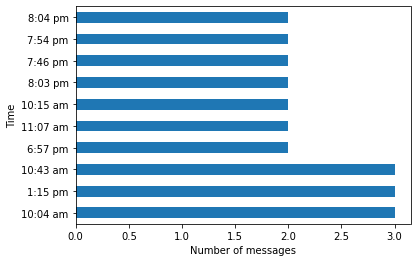

In [52]:
messages_df['Time'].value_counts().head(10).plot.barh()
plt.xlabel('Number of messages')
plt.ylabel('Time')

In [53]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

l = ["pappu mama", "Dilip Mama CSN","Bhagyashri Bai","Kajal Tai","+91 86691 34986"]
for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Average Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  #emojis conists of total emojis
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent', emojis)
  #links consist of total links
  links = sum(req_df["urlcount"])   
  print('Links Sent', links)
  print()

Stats of pappu mama -
Messages Sent 7
Average Words per message 3.857142857142857
Media Messages Sent 4
Emojis Sent 4
Links Sent 0

Stats of Dilip Mama CSN -
Messages Sent 38
Average Words per message 59.81578947368421
Media Messages Sent 61
Emojis Sent 23
Links Sent 3

Stats of Bhagyashri Bai -
Messages Sent 20
Average Words per message 63.3
Media Messages Sent 0
Emojis Sent 44
Links Sent 1

Stats of Kajal Tai -
Messages Sent 14
Average Words per message 1.7142857142857142
Media Messages Sent 1
Emojis Sent 56
Links Sent 0

Stats of +91 86691 34986 -
Messages Sent 32
Average Words per message 46.125
Media Messages Sent 49
Emojis Sent 56
Links Sent 4



In [54]:
total_emojis_list = list(set([a for b in messages_df.emoji for a in b]))
total_emojis = len(total_emojis_list)

total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
  print(i)
  
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
import plotly.express as px
fig = px.pie(emoji_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()


('🎂', 66)
('💐', 51)
('👌', 29)
('🤣', 25)
('🥰', 23)
('😂', 18)
('🚩', 18)
('🙏', 18)
('🍫', 16)
('😀', 16)
('👉', 15)
('🥳', 14)
('🌹', 13)
('👌🏻', 13)
('🙏🏻', 10)
('🎉', 10)
('👍', 8)
('😄', 8)
('🎊', 7)
('😘', 7)
('❤️', 6)
('🎈', 4)
('🌷', 4)
('😁', 4)
('🎁', 3)
('😇', 3)
('🍭', 3)
('🧁', 3)
('😜', 3)
('🤗', 3)
('🤨', 3)
('❣️', 3)
('🤪', 2)
('😊', 2)
('😍', 2)
('🍬', 2)
('👇', 2)
('👍🏻', 2)
('😡', 2)
('😆', 2)
('🌻', 2)
('🌺', 2)
('😛', 1)
('👏🏻', 1)
('🤭', 1)
('🙆\u200d♀️', 1)
('💥', 1)
('🔥', 1)
('🏏', 1)
('🧡', 1)
('💛', 1)
('😋', 1)
('😏', 1)
('🙈', 1)
('😅', 1)
('😯', 1)
('😔', 1)
('🍧', 1)
('🍡', 1)
('👑', 1)
('🌳', 1)
('🌍', 1)
('📖', 1)
('🌿', 1)


There are 38198 words in all the messages.


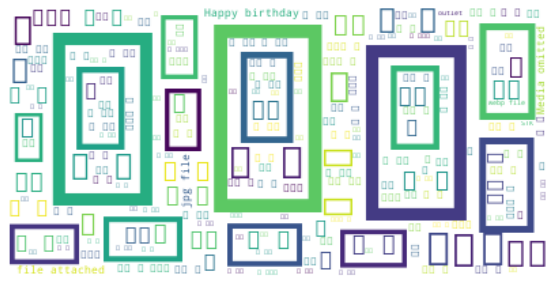

In [55]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Author name pappu mama


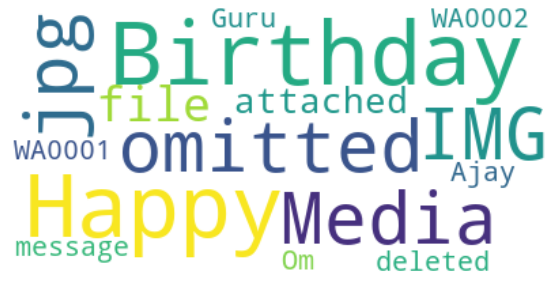

Author name Dilip Mama CSN


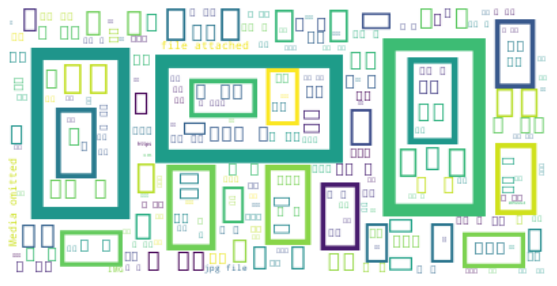

In [56]:
l = ["pappu mama", "Dilip Mama CSN"]
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  #Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  #Display the generated image   
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

Author name pappu mama


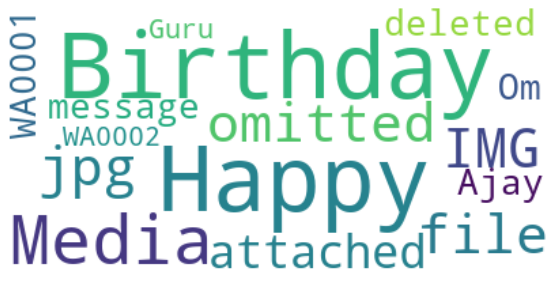

Author name Dilip Mama CSN


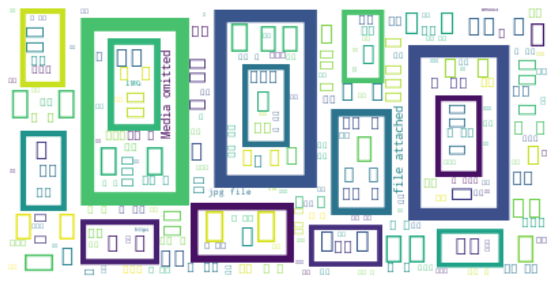

Author name Bhagyashri Bai


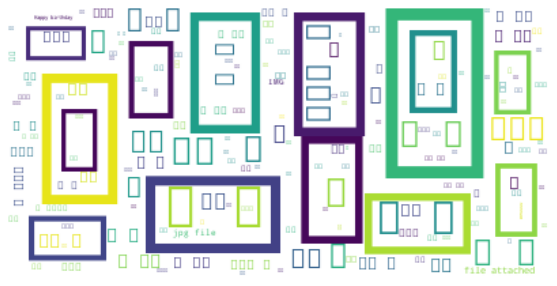

Author name Kajal Tai


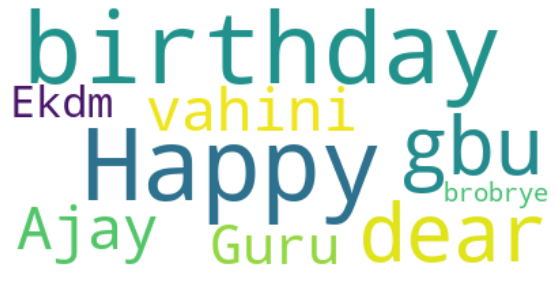

Author name +91 86691 34986


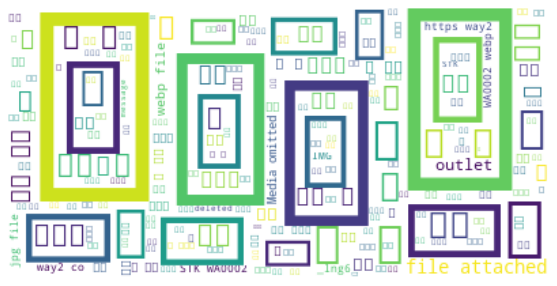

Author name Apeksha Mami Nsk


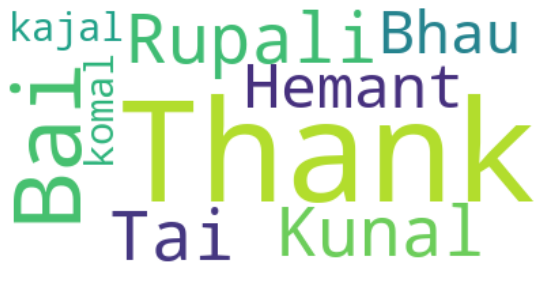

Author name Kaka


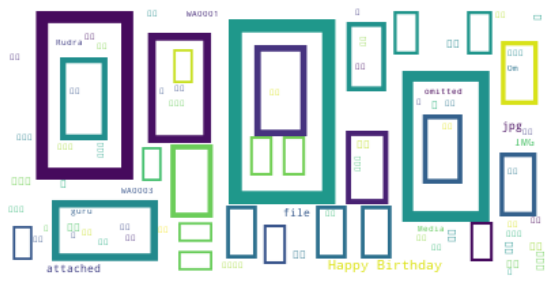

Author name Papa


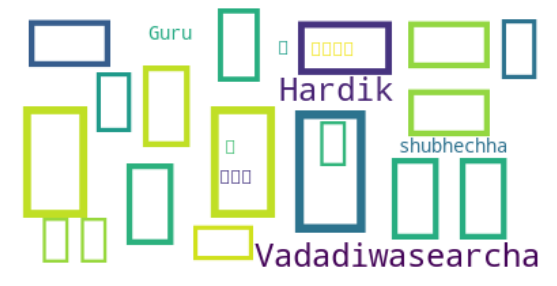

Author name Komal


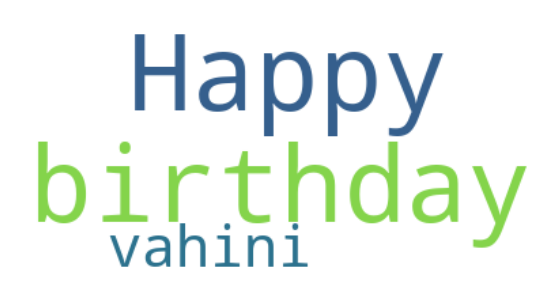

In [57]:
l = ["pappu mama", "Dilip Mama CSN","Bhagyashri Bai","Kajal Tai","+91 86691 34986","Apeksha Mami Nsk","Kaka","Papa","Komal"]
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  #Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  #Display the generated image   
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()